# Create CSV with data

In [1]:
from PIL import Image
import os

def verify_picture(pic):
    try:
        im = Image.open(pic)
        im.verify()
        im.close()
        return True
    except Exception as err: 
        return False

if os.name != 'nt': 
    out = verify_picture('../../MGU/Projekt/PS-Battles-master/originals/49366m.jpg')
    print(out)
else:
    out = verify_picture('..\..\MGU\Data\PS-Battles-master\originals\49366m.jpg')
    print(out)

False


In [2]:
import os

currentPath = os.getcwd()
path = '../../MGU/Projekt/PS-Battles-master/' if os.name != 'nt' else '..\..\MGU\Data\PS-Battles-master'
os.chdir(path)

orgg = 0
pss = 0

data = [['path', 'value']]

orgDir = 'NewOriginals' #originals
psDir = 'NewPhotoshops' #photoshops

org = os.listdir(orgDir)
for i in org:
    if verify_picture('originals/' + i):
        data.append([os.path.abspath('originals/' + i), 0])
        orgg += 1
        name = os.path.splitext(i)[0]
        for j in os.listdir('photoshops/' + name):
            if verify_picture('photoshops/' + name + '/' + j):
                data.append([os.path.abspath('photoshops/' + name + '/' + j), 1])
                pss += 1
                
                
print(f'All files: {orgg + pss}\n\tORG: {orgg}\n\tPSS: {pss}')
print(data[:3])

All files: 99074
	ORG: 11079
	PSS: 87995
[['path', 'value'], ['D:\\Studia\\MGU\\Data\\PS-Battles-master\\originals\\10092l.jpg', 0], ['D:\\Studia\\MGU\\Data\\PS-Battles-master\\photoshops\\10092l\\c69axf4_0.png', 1]]


In [3]:
import csv

os.chdir(currentPath)
name = 'data.csv' if os.name != 'nt' else 'dataWin.csv'

with open(name, 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(data)

csvFile.close()

In [4]:
import pandas as pd
import numpy as np

name = 'data.csv' if os.name != 'nt' else 'dataWin.csv'

labels = pd.read_csv(name)
labels.head()



,path,value
0,D:\Studia\MGU\Data\PS-Battles-master\originals...,0
1,D:\Studia\MGU\Data\PS-Battles-master\photoshop...,1
2,D:\Studia\MGU\Data\PS-Battles-master\photoshop...,1
3,D:\Studia\MGU\Data\PS-Battles-master\photoshop...,1
4,D:\Studia\MGU\Data\PS-Battles-master\photoshop...,1


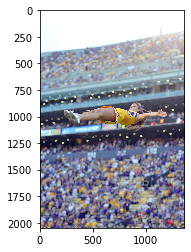

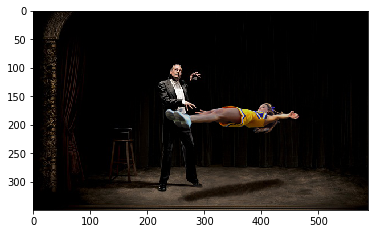

In [5]:
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

def get_image(path):
    img = Image.open(path)
    return np.array(img)


org_row = labels[labels.value == 0].path[0]
plt.imshow(get_image(org_row))
plt.show()

ps_row = labels[labels.value == 1].path[1]
plt.imshow(get_image(ps_row))
plt.show()